In [1]:
import numpy as np
import matplotlib.pyplot as plt

EXERCICIO 3

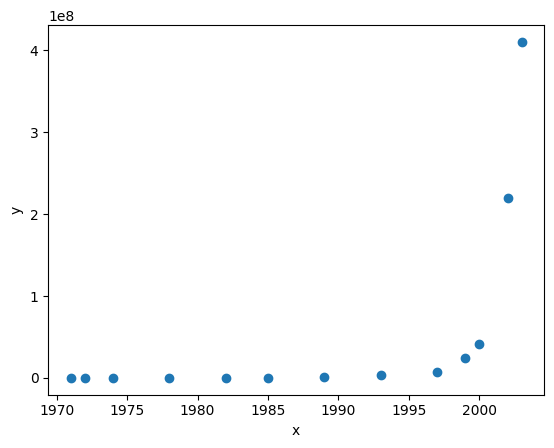

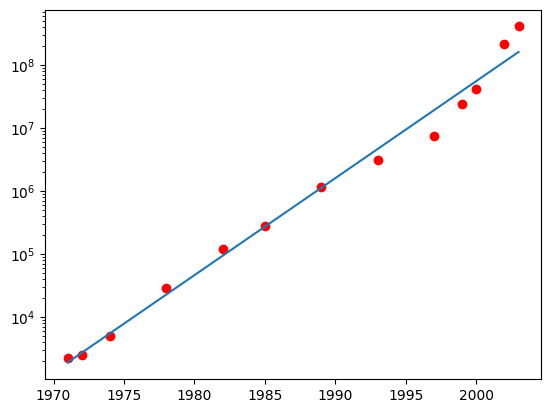

In [2]:
# A

x = np.array([1971, 1972, 1974, 1978, 1982, 1985, 1989, 1993, 1997, 1999, 2000, 2002, 2003])

y = np.array([2250, 2500, 5000, 29000, 120000, 275000, 1180000, 3100000, 7500000, 24000000, 42000000, 220000000, 410000000])

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

""" 

 com base na função do gráfico -> exponencial
    porém não é linear (entt nn daria pra fazer direto com regressão)
    
    -> função exp :  y = a e^(bx)
    
    -> linearizando: log(y) = log(a) + bx



"""
y_lin = np.log(y)


A = np.ones((13, 2))

A[:, 1] = x

coef = np.linalg.lstsq(A, y_lin, rcond=0)[0]

f =  lambda x: np.exp(coef[0] + x * coef[1])

f = np.vectorize(f)

plt.yscale('log')
plt.plot(x, y, 'ro')
plt.plot(x, f(x))
plt.show()



In [3]:

rms = np.sqrt (np.sum((y_lin - np.log(f(x))) ** 2) / 13)


print (rms)

0.4676013526044026


In [4]:
# C

""" 
    como os valores são de 1971 a 2003 é normal dar alta diferença para anos posteriores

    além disso, se colocarmos o ano '2015' e a qnt de transistores '4 x 10^9', a aproximação será melhor
"""

prever_ano = 2015

y_correto = 4 * (10 ** 9)

y_barra = np.exp(coef[0] + coef[1] * prever_ano)

y_barra = (y_barra)

print(f"Correto: {y_correto:,.0f}")
print(f"Regressão: {y_barra:,.0f}")

print(f"{y_correto - y_barra:,.0f}")

Correto: 4,000,000,000
Regressão: 11,387,036,869
-7,387,036,869


In [5]:
# D

diferenca_entre_anos = (2015 - 1971) /2.

previsao_lei_de_moore = y[0] * (2 ** diferenca_entre_anos)

print(f"Moore: {previsao_lei_de_moore:,.0f}")
print(f"Correto: {y_correto:,.0f}")
print(f"Regressão: {y_barra:,.0f}")


Moore: 9,437,184,000
Correto: 4,000,000,000
Regressão: 11,387,036,869
